# **TELECOM CUSTOMER CHURN PREDICTION**

Customer attrition, commonly referred to as customer churn, is the decision made by a customer to discontinue utilizing a company's goods or services. However, for each client who churns, there are usually early signs or metrics that can be discovered through churn research.Because customers can choose from a range of service providers and actively switch from one to another, the telecom industry experiences a high rate of churn (annual churn rate of 15-25%).

In general, from a business standpoint, acquiring new clients is more expensive than keeping current ones. In fact, a 5% improvement in client retention alone can boost profits by at least 25%. This is due to the fact that returning consumers are likely to spend an additional 60% on a company's goods and services. As a result, the company can spend less on the operating costs of having to attract new consumers by spending time and money encouraging a current customer to choose your company over competitors because they've already made up their mind.

If a business could predict which customers are most likely to depart and why, it could concentrate its customer retention efforts exclusively on these "high risk" clients. This contributes to the company's goal of extending its consumer base and regaining customer loyalty.

# Dataset

For the analysis, I have used "Telecom Customer" dataset from kaggle.

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The raw data contains 7043 rows (customers) and 21 columns (features).

The “Churn” column is our target.



# Objectives for the Analysis of Telecom Dataset:

1. What is the percentage of active customers and customers who churn?
2. Does gender influence customer churn?
3. Does the sort of service supplied result in greater or less customer churn?
4. What are the most profitable service categories?
5. Features and services offered by the business that are profitable


In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


In [ ]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Dataset Descrition

Churn Column - Customers who left recently

Services provided by the company to its customer – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

Customer's Information Columns - Old/New Customer and their Active Period, contract, payment method, paperless billing, monthly charges, and total charges

Customer's Demographic Columns – gender, age range, and if they have partners and dependents

The next lines of code, convert the values in the column "TotalCharges" to numeric. 

After that, we are checking for null values in the column and we can see that "TotalCharges" have 11 missing entries. As compared to the dataset entries, it is safe to remove the rows where the Total charges is 0. Therefore, I have dropped the rows which dont have entry for total charges. 

In [ ]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')

In [ ]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
df.fillna(df["TotalCharges"].mean())
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df = df.drop(['customerID'], axis = 1)

# EXPLORATORY DATA ANALYSIS

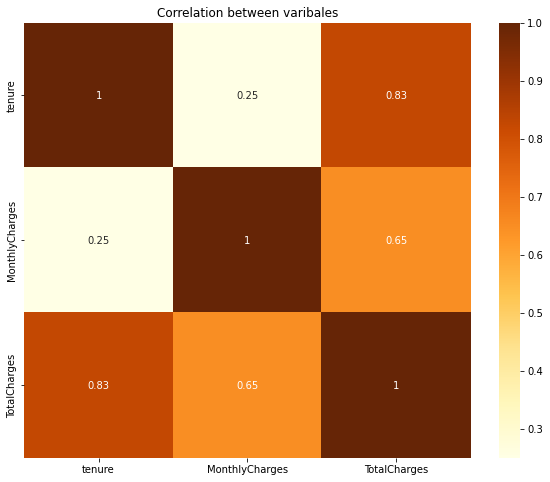

In [ ]:
correlation = df.corr().round(2)
plt.figure(figsize = (10,8))
plt.title('Correlation between varibales')
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

# Churn Distribution according to Gender

1. 26.6% of current customers switched to another firm
2. There are 49.5% females and 50.5% males.
3. There's almost no difference between the gender who churned, as both men and women are churn in equal ratio.

In [ ]:
gender_labels = ['Male', 'Female']
churn_labels = ['No', 'Yes']
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=gender_labels, values=df['gender'].value_counts(), name="Gender"),
              1, 1)
fig.add_trace(go.Pie(labels=churn_labels, values=df['Churn'].value_counts(), name="Churn"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.55, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Gender and Churn Distributions",
    annotations=[dict(text='Gender', x=0.20, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.79, y=0.5, font_size=20, showarrow=False)])
fig.data[0].marker.colors = ('#7fcdff','#326ada')
fig.data[1].marker.colors = ('#56c175','#ff9b35')
fig.show()

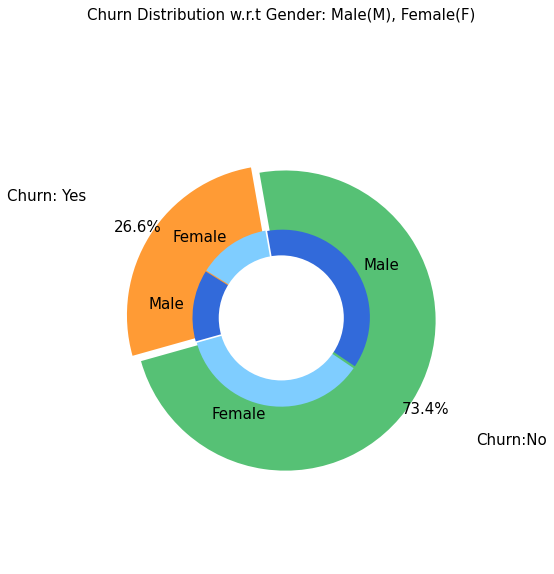

In [ ]:
plt.figure(figsize=(8, 8))
labels =["Churn: Yes","Churn:No"]
values = [1869,5163]
labels_gender = ["Female","Male","Female","Male"]
sizes_gender = [939,930 , 2544,2619]
colors = ['#ff9b35', '#56c175']
colors_gender = ['#7fcdff','#326ada', '#7fcdff','#326ada']
explode = (0.4,0.4) 
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.10, labeldistance=1.50,colors=colors, startangle=100,frame=True, explode=explode,radius=12, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=100, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# show plot 
 
plt.axis('equal')
plt.tight_layout()
plt.show()

**Contract Distribution with respect to Churn**

75% of customers with month-to-month contracts chose to leave, compared to 13% of customers with one-year contracts and 3% of consumers with two-year contracts.

In [ ]:
color_discrete_map = {"Month-to-month": "#7fcdff", "One year": "#326ada", "Two year": "#ff9b35"}

fig = px.histogram(df, x="Churn", color="Contract", barmode="group", title="<b>Contract Type and Churn Distribution <b>", color_discrete_map = color_discrete_map)
fig.update_layout(width=800, height=500, bargap=0.5)
fig.show()

In [ ]:
fig = px.histogram(df, x="Churn", color="PaymentMethod", title="<b>Churn distribution w.r.t. Customer Payment Method</b>",text_auto=True)
fig.update_layout(width=800, height=550, bargap=0.1)
fig.data[0].marker.color = ('#7fcdff')
fig.data[1].marker.color = ('#326ada')
fig.data[2].marker.color = ('#ff9b35')
fig.data[3].marker.color = ('#56c175')


fig.show()

In [ ]:
 df[df["gender"]=="Male"][["InternetService", "Churn"]].value_counts()

InternetService  Churn
DSL              No       992
Fiber optic      No       910
No               No       717
Fiber optic      Yes      633
DSL              Yes      240
No               Yes       57
dtype: int64

In [ ]:

df[df["gender"]=="Female"][["InternetService", "Churn"]].value_counts()

InternetService  Churn
DSL              No       965
Fiber optic      No       889
No               No       690
Fiber optic      Yes      664
DSL              Yes      219
No               Yes       56
dtype: int64

In [ ]:
fig = go.Figure()

colors = {'Female':'steelblue','Male':'firebrick'}

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [965, 992, 219, 240],
  name = 'DSL'))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [889, 910, 664, 633],
  name = 'Fiber optic',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [690, 717, 56, 57],
  name = 'No Internet',
))


fig.update_layout(title_text="<b>Churn Distribution w.r.t Internet Service and Gender</b>")
fig.data[0].marker.color = ('#7fcdff','#7fcdff','#7fcdff','#7fcdff')
fig.data[1].marker.color = ('#326ada','#326ada','#326ada','#326ada')
fig.data[2].marker.color = ('#ff9b35','#ff9b35','#ff9b35','#ff9b35')


fig.show()

In [ ]:
color_map = {"Yes": "#7fcdff", "No": "#326ada"}
fig = px.histogram(df, x="Churn", color="Dependents", barmode="group", title="<b>Churn distribution w.r.t. Dependents</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.5)
fig.show()

In [ ]:
color_map = {"Yes": 'purple', "No": 'green'}
fig = px.histogram(df, x="Churn", color="Partner", barmode="group", title="<b>Churn distribution w.r.t. Partners</b>", color_discrete_map=color_map)
fig.update_layout(width=800, height=560, bargap=0.5)
fig.show()

**Observations:**

1. Majority of the customers who moved out were having Electronic Check as Payment Method and others who opted for Credit-Card automatic transfer / Bank Automatic Transfer and Mailed Check as Payment Method were less likely to switch.
2. Fiber optic service was choosen by a lot of customers and a high churn rate among these customers. This could mean an issue with the Fiber optic service which and its dissatisfaction among customers.
3. Customers who opted for DSL service are greater in mumber and have less churn rate compared to Fibre optic service
4. Customers without dependents are more likely to churn.
5. Customers who have partners are more likely to churn while senior citizens being the most of churn.


In [ ]:
color_map = {"Yes": 'white', "No": 'red'}
fig = px.histogram(df, x="Churn", color="SeniorCitizen", title="<b>Churn distribution w.r.t. Senior Citizen</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.5)
fig.show()

In [ ]:
color_map = {"Yes": "#7fcdff", "No": "#326ada", "No internet service":"#ff9b35"}
fig = px.histogram(df, x="Churn", color="OnlineSecurity", barmode="group", title="<b>Churn w.r.t Online Security</b>", color_discrete_map=color_map)
fig.update_layout(width=800, height=550, bargap=0.5)
fig.show()

In [ ]:
color_map = {"Yes": 'teal', "No": 'red'}
fig = px.histogram(df, x="Churn", color="PaperlessBilling",  title="<b>Churn distribution w.r.t. Paperless Billing</b>", color_discrete_map=color_map)
fig.update_layout(width=800, height=550, bargap=0.1)
fig.show()

In [ ]:
color_map = {"Yes": "#7fcdff", "No": "#326ada", "No internet service":"#ff9b35"}


fig = px.histogram(df, x="Churn", color="TechSupport",barmode="group",  title="<b>Churn distribution w.r.t. TechSupport</b>", color_discrete_map=color_map)
fig.update_layout(width=800, height=550, bargap=0.5)
fig.show()

In [ ]:
color_map = {"Yes": '#7fcdff', "No": '#326ada'}
fig = px.histogram(df, x="Churn", color="PhoneService", title="<b>Churn distribution w.r.t. Phone Service</b>", color_discrete_map=color_map)
fig.update_layout(width=800, height=550, bargap=0.1)
fig.show()

**Observations:**

1. Absence of online security,makes most customers churn.
2. Paperless Billing seems like one the reasons because of which customers are most likely to churn.
3. The absence of online security, Paperless Billing system and services with no TechSupport were the similiar trend are of the customers who are most likely churn.
4. Eventhough there's a small fraction of customers but it's better to point out as they are more likely to churn because don't have a phone service.

# Feature and Target relationship Distribution



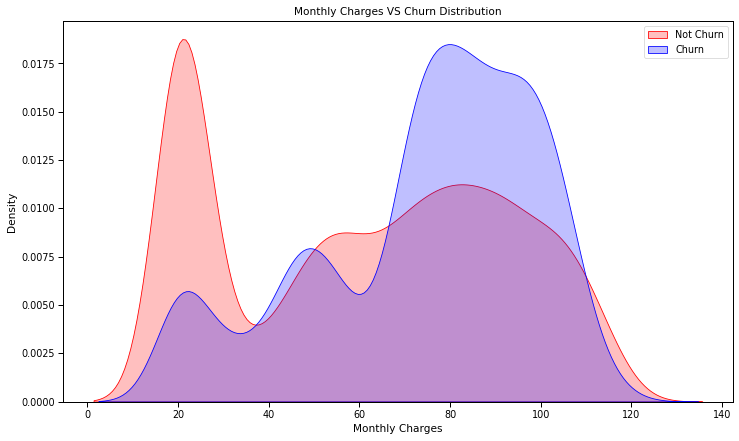

In [ ]:
plt.rcParams['figure.figsize']=(12,7)

sns.set_context("paper",font_scale=1.1)

ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Monthly Charges VS Churn Distribution');

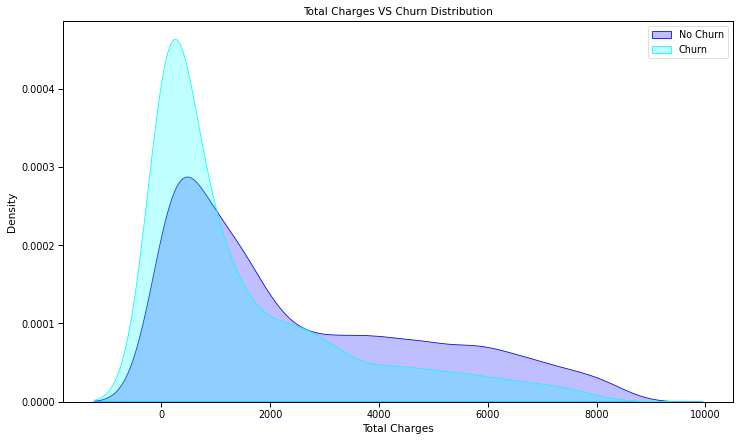

In [ ]:
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No') ],
                color="blue", shade = True);
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="cyan", shade= True);
ax.legend(["No Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Total Charges VS Churn Distribution');

In [ ]:
fig = px.box(df, x='Churn', y = 'tenure')

# Update yaxis properties
fig.update_yaxes(title_text='Tenure (Months)', row=1, col=1)
# Update xaxis properties
fig.update_xaxes(title_text='Churn', row=1, col=1)

# Update size and title
fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Tenure vs Churn Boxplot</b>',
)

fig.show()

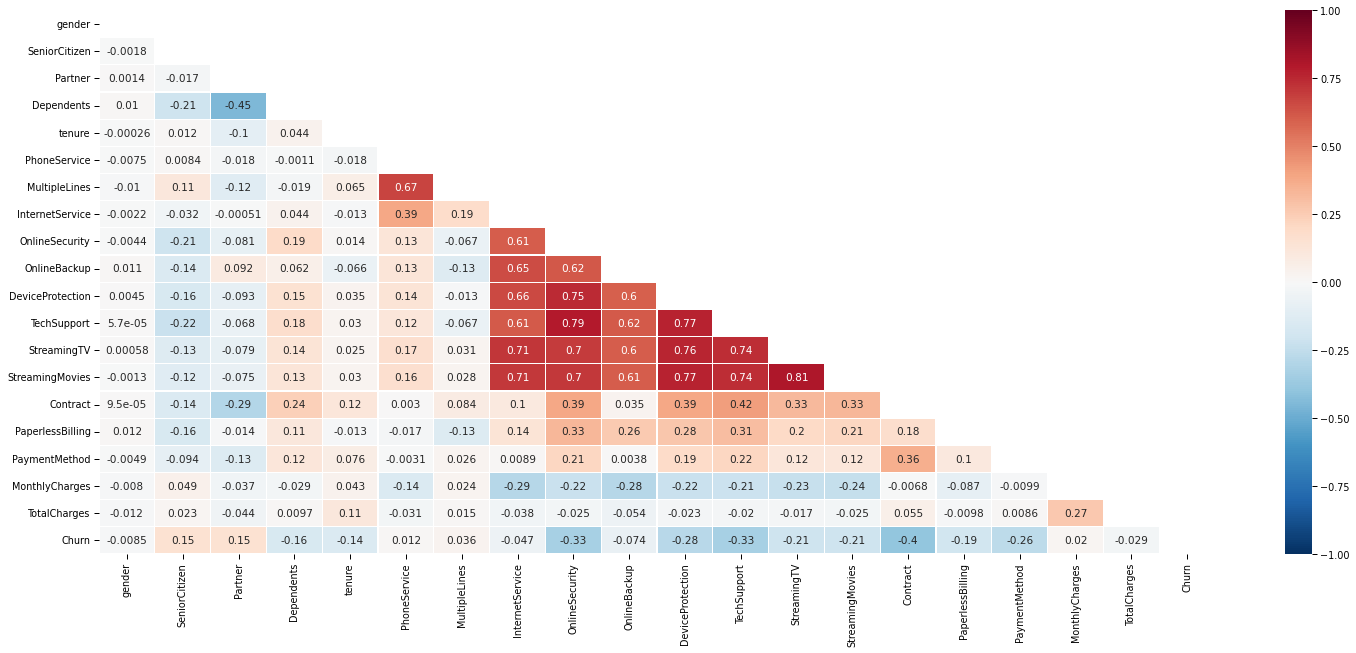

In [ ]:
plt.figure(figsize=(25, 10))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='RdBu_r', vmin=-1, vmax=1)

# **Data Processing**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, classification_report
from xgboost import XGBClassifier


Splitting the data into train and test sets

In [ ]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [ ]:
df2 = df
df = df.apply(lambda x: object_to_int(x))
X = df.drop(columns = ['Churn'])
y = df['Churn'].values
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


Before building the moels, it is important to check the data distribution. Because the numerical features are distributed over different value ranges, we will use standard scalar to scale to same range.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [ ]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

Distribution Graph Before Scaling


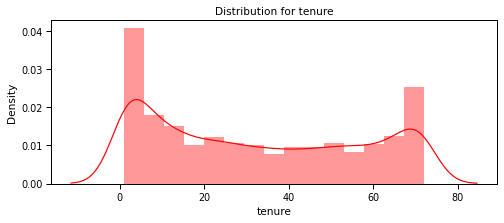

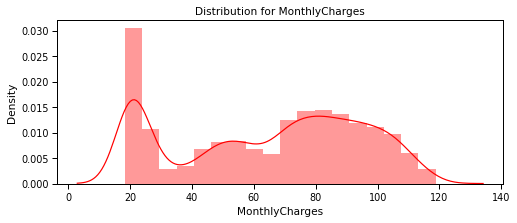

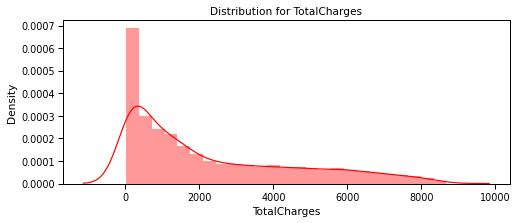

In [ ]:
print('Distribution Graph Before Scaling')
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
for feat in num_cols: distplot(feat, df)

Standardizing Numerical Features

Distribution Graph After Scaling


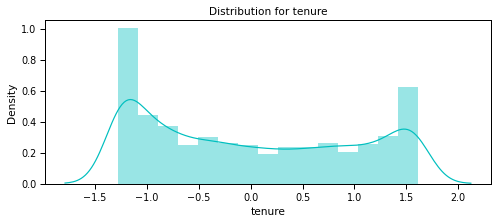

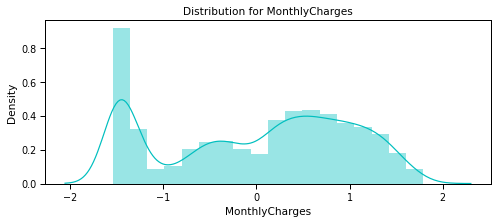

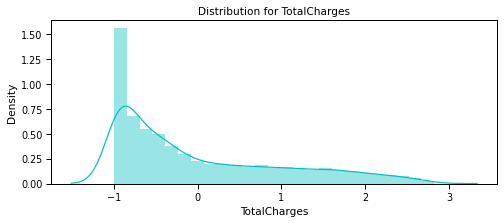

In [ ]:
print('Distribution Graph After Scaling')

df_std = pd.DataFrame(StandardScaler().fit_transform(df[num_cols].astype('float64')),
                       columns=num_cols)
for feat in num_cols: distplot(feat, df_std, color='c')

In [ ]:
cat_cols_ohe =['PaymentMethod', 'Contract', 'InternetService'] # those that need one-hot encoding
cat_cols_le = list(set(X_train.columns)- set(num_cols) - set(cat_cols_ohe)) #those that need label encoding

In [ ]:
scaler= StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# SUPPORT VECTOR CLASSIFIER (SVC)

SVM accuracy is : 0.8194740582800284
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      1042
           1       0.74      0.47      0.58       365

    accuracy                           0.82      1407
   macro avg       0.79      0.71      0.73      1407
weighted avg       0.81      0.82      0.81      1407

------------------------------------------------------------


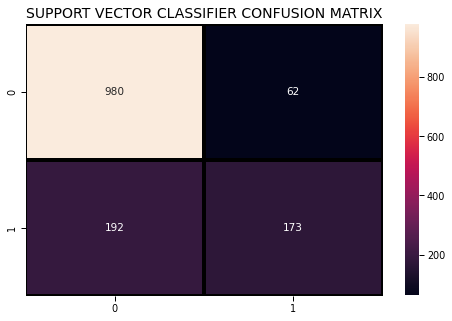

In [ ]:
svc_model = SVC()
svc_model.fit(X_train,y_train)
predict_y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test,y_test)
print("SVM accuracy is :",accuracy_svc)
print('-'*60)
print(classification_report(y_test, predict_y))
print('-'*60)
plt.figure(figsize=(8,5))

sns.heatmap(confusion_matrix(y_test, predict_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("SUPPORT VECTOR CLASSIFIER CONFUSION MATRIX",fontsize=14)
plt.show()

0.8230277185501066
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      1042
           1       0.74      0.50      0.59       365

    accuracy                           0.82      1407
   macro avg       0.79      0.72      0.74      1407
weighted avg       0.81      0.82      0.81      1407

------------------------------------------------------------


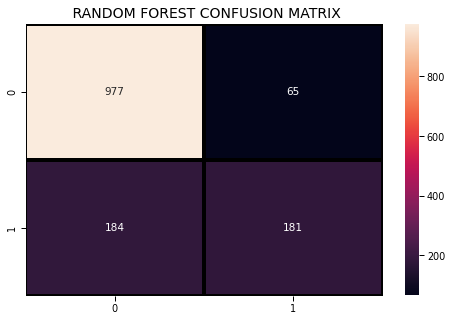

------------------------------------------------------------


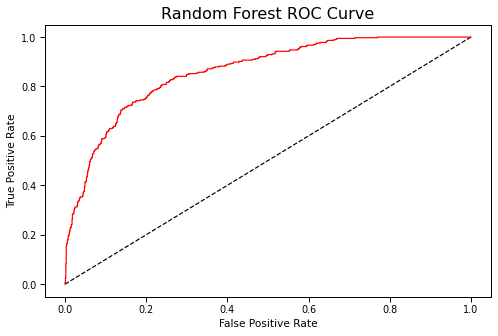

In [ ]:
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =65, max_features = "auto",
                                  max_leaf_nodes = 35)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))
print('-'*60)

# 500, 50, 30

print(classification_report(y_test, prediction_test))
print('-'*60)

plt.figure(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, prediction_test),annot=True,fmt = "d",linecolor="k",linewidths=3)

    
plt.title(" RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.show()
print('-'*60)

y_rfpred_prob = model_rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)
plt.figure(figsize=(8, 5))
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show();

Logistic Regression accuracy is : 0.820184790334044
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1042
           1       0.69      0.56      0.62       365

    accuracy                           0.82      1407
   macro avg       0.77      0.73      0.75      1407
weighted avg       0.81      0.82      0.81      1407

------------------------------------------------------------


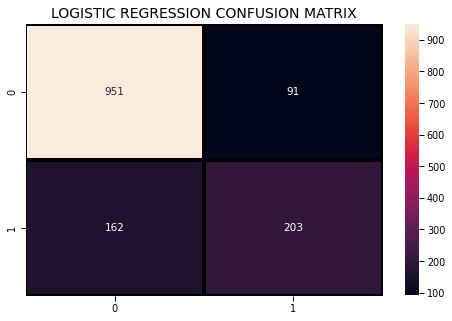

------------------------------------------------------------


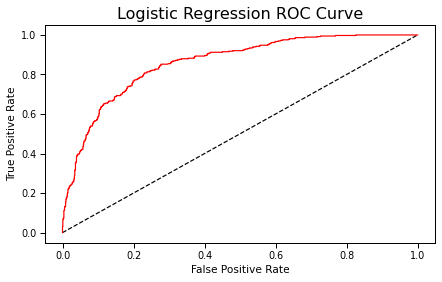

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)
print('-'*60)

lr_pred= lr_model.predict(X_test)
report = classification_report(y_test,lr_pred)
print(report)

print('-'*60)

plt.figure(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, lr_pred),annot=True,fmt = "d",linecolor="k",linewidths=3)    
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

print('-'*60)

y_pred_prob = lr_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(7, 4))

plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve',fontsize=16)
plt.show();

Logistic Regression accuracy is : 0.820184790334044
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1042
           1       0.69      0.56      0.62       365

    accuracy                           0.82      1407
   macro avg       0.77      0.73      0.75      1407
weighted avg       0.81      0.82      0.81      1407

------------------------------------------------------------


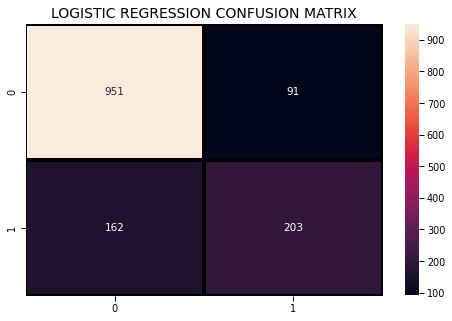

------------------------------------------------------------


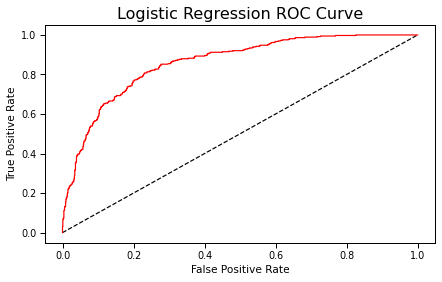

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)
print('-'*60)

lr_pred= lr_model.predict(X_test)
report = classification_report(y_test,lr_pred)
print(report)

print('-'*60)

plt.figure(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, lr_pred),annot=True,fmt = "d",linecolor="k",linewidths=3)    
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

print('-'*60)

y_pred_prob = lr_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(7, 4))

plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve',fontsize=16)
plt.show();

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
predictdt_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)

print(classification_report(y_test, predictdt_y))

Decision Tree accuracy is : 0.7434257285003554
              precision    recall  f1-score   support

           0       0.83      0.82      0.83      1042
           1       0.51      0.52      0.51       365

    accuracy                           0.74      1407
   macro avg       0.67      0.67      0.67      1407
weighted avg       0.75      0.74      0.74      1407



Gradient Boosting Classifier 0.8208955223880597
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1042
           1       0.71      0.53      0.61       365

    accuracy                           0.82      1407
   macro avg       0.78      0.73      0.75      1407
weighted avg       0.81      0.82      0.81      1407



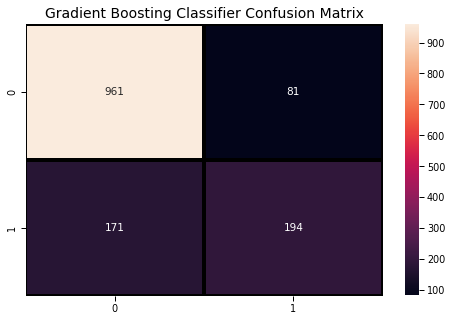

In [ ]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
print("Gradient Boosting Classifier", accuracy_score(y_test, gb_pred))

print(classification_report(y_test, gb_pred))


plt.figure(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, gb_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Gradient Boosting Classifier Confusion Matrix",fontsize=14)
plt.show()